In [1]:
import pandas as pd
import numpy as np

In [3]:
import pathlib
import matplotlib.pyplot as plt
import tensorflow as tf

data=pathlib.Path('/Users/akshatsinha/Downloads/NWPU-RESISC45')
class_names=[item.name for item in data.glob('*')]
print("Classes:",class_names)

Classes: ['forest', 'railway_station', 'tennis_court', 'basketball_court', 'river', 'storage_tank', '.DS_Store', 'harbor', 'terrace', 'thermal_power_station', 'golf_course', 'runway', 'roundabout', 'bridge', 'industrial_area', 'baseball_diamond', 'mobile_home_park', 'overpass', 'church', 'chaparral', 'railway', 'stadium', 'medium_residential', 'sea_ice', 'intersection', 'lake', 'palace', 'airplane', 'cloud', 'sparse_residential', 'airport', 'snowberg', 'parking_lot', 'commercial_area', 'rectangular_farmland', 'island', 'beach', 'circular_farmland', 'dense_residential', 'ship', 'mountain', 'desert', 'freeway', 'meadow', 'wetland', 'ground_track_field']


(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


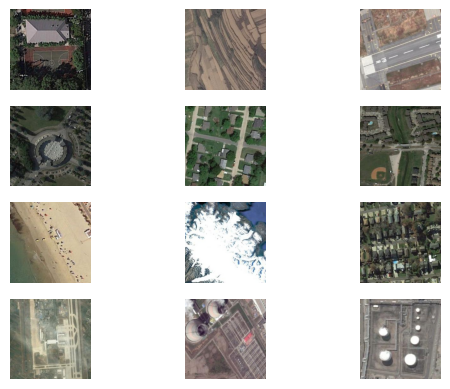

In [26]:
import random
import matplotlib.image as pltimg

image_sample=list(data.glob('*/*.jpg'))
for i in range(12):
    img_path=random.choice(image_sample)
    img=pltimg.imread(img_path)
    plt.subplot(4,3,i+1)
    plt.imshow(img)
    plt.axis('off')
    print(img.shape)

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen=ImageDataGenerator(
    rescale=1/255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_data=datagen.flow_from_directory(
    '/Users/akshatsinha/Downloads/NWPU-RESISC45',
    target_size=(224,224),
    batch_size=32,
    subset='training',
    class_mode='sparse'
)

test_data=datagen.flow_from_directory(
    '/Users/akshatsinha/Downloads/NWPU-RESISC45',
    target_size=(224,224),
    batch_size=32,
    subset='validation',
    class_mode='sparse'
)

Found 25200 images belonging to 45 classes.
Found 6300 images belonging to 45 classes.


In [33]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers,models

resnet_model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
resnet_model.trainable=False

x=layers.GlobalAveragePooling2D()(resnet_model.output)
x=layers.Dense(256,activation='relu')(x)
x=layers.Dropout(0.3)(x)
output=layers.Dense(45,activation='softmax')(x)  # 45 RESISC45 classes

model=models.Model(inputs=resnet_model.input,outputs=output)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [34]:
history=model.fit(train_data,validation_data=test_data,epochs=5)

/Users/akshatsinha/Library/Python/3.9/lib/python/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


2025-08-26 08:42:38.630217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


788/788 ━━━━━━━━━━━━━━━━━━━━ 231s 288ms/step - accuracy: 0.0374 - loss: 4.0194 - val_accuracy: 0.0590 - val_loss: 3.5286
Epoch 2/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 268s 341ms/step - accuracy: 0.0545 - loss: 3.7368 - val_accuracy: 0.0827 - val_loss: 3.4441
Epoch 3/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 263s 333ms/step - accuracy: 0.0694 - loss: 3.5852 - val_accuracy: 0.0911 - val_loss: 3.3811
Epoch 4/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 261s 331ms/step - accuracy: 0.0754 - loss: 3.4866 - val_accuracy: 0.0911 - val_loss: 3.3447
Epoch 5/5
788/788 ━━━━━━━━━━━━━━━━━━━━ 2598s 3s/step - accuracy: 0.0907 - loss: 3.4231 - val_accuracy: 0.1000 - val_loss: 3.2810


In [36]:
model.save("resisc45_base_model.keras")

In [2]:
import seaborn as sns